In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/MyDrive/Smart_Vision1/SmartVisionNeuralNetworks'


Mounted at /content/drive


In [ ]:
import os
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
import numpy as np

# Define image folder path
image_dir = '/content/drive/MyDrive/Smart_Vision1/SmartVisionNeuralNetworks'

# Extract features from images
features = []
image_paths = os.listdir(image_dir)
for img_path in image_paths:
    img = load_img(os.path.join(image_dir, img_path), target_size=(224, 224))
    img_data = img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    features.append(VGG16(weights='imagenet', include_top=False).predict(img_data).flatten())

# Apply K-Means
features = np.array(features)
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(features)

# Print labels
for img_path, label in zip(image_paths, labels):
    print(f"{img_path}: Category {label}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Streaming output truncated to the last 5000 lines.
23971.jpg: Category 4
23957.jpg: Category 3
24042.jpg: Category 4
24035.jpg: Category 4
2398.jpg: Category 4
23970.jpg: Category 5
2396.jpg: Category 1
23992.jpg: Category 3
23944.jpg: Category 3
23966.jpg: Category 4
23985.jpg: Category 3
23991.jpg: Category 0
23954.jpg: Category 0
24002.jpg: Category 4
2403.jpg: Category 4
23963.jpg: Category 5
24028.jpg: Category 3
2404.jpg: Category 0
23980.jpg: Category 0
23953.jpg: Category 5
24031.jpg: Category 1
24015.jpg: Category 1
24048.jpg: Category 0
24046.jpg: Category 0
24030.jpg: Category 4
23983.jpg: Category 0
24038.jpg: Category 3
24014.jpg: Category 1
2395.jpg: Category 0
24025.jpg: Category 4
23960.jpg: Category 1
2401.jpg: Category 4
2402.jpg: Category 0
24012.jpg: Category 5
24125.jpg: Category 0
24140.jpg: Category 4
24084.jpg: Category 1
24068.jpg: Category 3
24142.jpg: Category 1
24074.jpg: Category 0
24079.jpg: Category 1
24134.jpg: Category 1
24157.jpg: Category 1
24114.jpg:

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
img = Image.open("/content/drive/MyDrive/Smart_Vision1/SmartVisionNeuralNetworks/10012.jpg")
width, height = img.size
print(f"Width: {width}, Height: {height}")
img = Image.open("/content/drive/MyDrive/Smart_Vision1/SmartVisionNeuralNetworks/12373.jpg")
width, height = img.size
print(f"Width: {width}, Height: {height}")


(5124, 25088)
(2197, 25088)
(5124,)
(2197,)
Width: 150, Height: 150
Width: 150, Height: 150


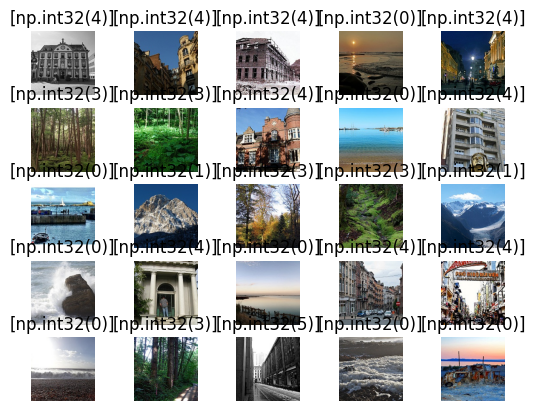

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(Image.open(f"{image_dir}/{image_paths[i]}"))
    plt.title([labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import numpy as np

#TRAINING CNN MODEL

input_dim=x_train.shape[1]

# Define the model architecture
def create_model(optimizer='adam'):
   model = Sequential()
   x= model.add(Conv2D(146, (5, 5), activation='relu', input_shape=(input_dim), padding='same'))
   x= model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)
   x= model.add(Flatten())(x)
   x= model.add(Dense(256, activation='relu'))(x)
   x= model.add(Dense(128, activation='relu'))(x)
   x= model.add(Dense(64, activation='softmax'))(x)

   if optimizer == 'adam':
        opt = Adam()
   elif optimizer == 'rmsprop':
        opt = RMSprop()
   else:
        opt = SGD()

   model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
   return model

In [ ]:
# Assuming you have a function like this to create your CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy


def create_dense_model(optimizer, input_dim, num_classes):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Select optimizer
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    else:
        opt = SGD()


    model.compile(optimizer=opt,
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model


# Define your hyperparameter grid
optimizers = ['adam', 'rmsprop', 'sgd']
epochs_list = [10, 20, 30, 70]
batch_sizes = [32, 64, 82]

# Initialize variables to store the best results
best_optimizer = None
best_epochs = None
best_batch_size = None
best_score = 0
best_model = None
best_history = None

# Determine input dimension and number of classes for the Dense model
input_dim = x_train.shape[1]
num_classes = len(np.unique(labels))

for optimizer_name in optimizers:
    for epoch in epochs_list:
        for batch_size in batch_sizes:
            print(f"Training with optimizer={optimizer_name}, epochs={epoch}, batch_size={batch_size}")

            # Create a new Dense model instance for each combination
            model = create_dense_model(optimizer_name, input_dim, num_classes)

            # Fit the model
            history = model.fit(x_train, y_train,
                                epochs=epoch,
                                batch_size=batch_size,
                                verbose=0,
                                validation_data=(x_test, y_test))

            # Evaluate the model on the validation set
            loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
            print(f"  Validation Accuracy: {accuracy:.4f}")

            # Check if this is the best model
            if accuracy > best_score:
                best_score = accuracy
                best_optimizer = optimizer_name
                best_epochs = epoch
                best_batch_size = batch_size
                best_model = model
                best_history = history

# Output the best hyperparameters and score
print("\nHyperparameter tuning complete.")
print(f"Best Parameters: optimizer={best_optimizer}, epochs={best_epochs}, batch_size={best_batch_size}")
print(f"Best Validation Accuracy: {best_score:.4f}")

Training with optimizer=adam, epochs=10, batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.9176
Training with optimizer=adam, epochs=10, batch_size=64
  Validation Accuracy: 0.9308
Training with optimizer=adam, epochs=10, batch_size=82
  Validation Accuracy: 0.9463
Training with optimizer=adam, epochs=20, batch_size=32
  Validation Accuracy: 0.9326
Training with optimizer=adam, epochs=20, batch_size=64
  Validation Accuracy: 0.9285
Training with optimizer=adam, epochs=20, batch_size=82
  Validation Accuracy: 0.9417
Training with optimizer=adam, epochs=30, batch_size=32
  Validation Accuracy: 0.9349
Training with optimizer=adam, epochs=30, batch_size=64
  Validation Accuracy: 0.9226
Training with optimizer=adam, epochs=30, batch_size=82
  Validation Accuracy: 0.9490
Training with optimizer=adam, epochs=70, batch_size=32
  Validation Accuracy: 0.9445
Training with optimizer=adam, epochs=70, batch_size=64
  Validation Accuracy: 0.9472
Training with optimizer=adam, epochs=70, batch_size=82
  Validation Accuracy: 0.9417
Training with optimizer=rmsprop, ep

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])
calls= EarlyStopping(monitor='val_loss',patience=10)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

#TRAINING ANN MODEL

# Define input shape
input_shape = (x_train.shape[1],)

# Define the input layer
main_input = Input(shape=input_shape, name='main_input')

# Define the layers
model=Sequential()
input_dim=x_train.shape[1]
y = Dense(64, activation='relu')(main_input)
y = Dense(32, activation='relu')(y)

# Define the output layer
n_classes = 6
outputs = Dense(n_classes, activation='softmax')(y)


# Compile the model using SparseCategoricalCrossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Define the EarlyStopping callback
calls= EarlyStopping(monitor='val_loss',patience=10)

# Display model summary to verify layers are added
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#HYBRID MODEL

# Final output layer
n_classes = 6
outputs = Dense(n_classes, activation='softmax')(y)

# Create the model
hybrid_model = Model(inputs=main_input, outputs=outputs)

# Compile the model
hybrid_model.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer='adam',
                     metrics=['accuracy'])

# Model summary
hybrid_model.summary()

Model: "functional_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ main_input (InputLayer)         │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,974 (6.13 MB)

 Trainable params: 1,607,974 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=hybrid_model.fit(x_train, y_train , epochs=best_epochs, batch_size=best_batch_size,validation_data=(x_test,y_test),callbacks= calls)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7708 - loss: 1.7586 - val_accuracy: 0.9053 - val_loss: 0.6589
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9543 - loss: 0.2814 - val_accuracy: 0.8999 - val_loss: 0.7649
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9711 - loss: 0.1348 - val_accuracy: 0.9349 - val_loss: 0.6351
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9927 - loss: 0.0423 - val_accuracy: 0.9367 - val_loss: 0.4364
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9964 - loss: 0.0231 - val_accuracy: 0.9340 - val_loss: 0.5447
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9969 - loss: 0.0212 - val_accuracy: 0.9390 - val_loss: 0.4733
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9990 - loss: 0.0067 - val_accuracy: 0.9322 - val_loss: 0.4763
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9984 - loss: 0.0078 - val_accuracy: 0.9367 - v

In [ ]:
y_pred=hybrid_model.predict(x_test)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


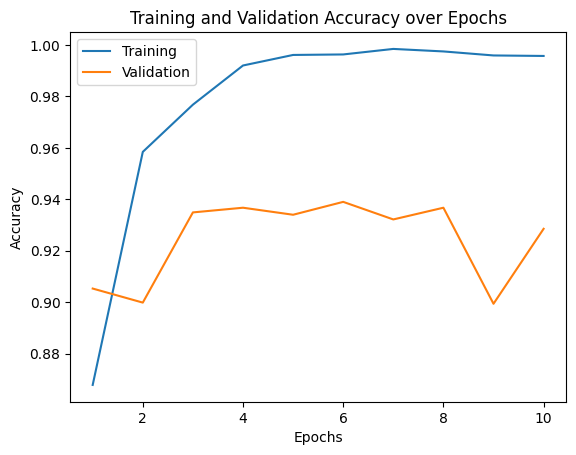

In [ ]:
import matplotlib.pyplot as plt

# Get the number of epochs from the history object
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label='Training')
plt.plot(epochs, history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()